# Instalacion de librerias

# Libraries

In [21]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import nbconvert

# CITATIONS

[1] Shi, L., Westerhuis, J. A., Rosén, J., Landberg, R., & Brunius, C. (2019). Variable selection and validation in multivariate modelling. Bioinformatics, 35(6), 972-980.
[2] Shafizadeh-Moghadam, H. (2021). Fully component selection: An efficient combination of feature selection and principal component analysis to increase model performance. Expert Systems with Applications, 186, 115678.
[3] Lu, T. (2022, June). Research on the Variable Selection Methods Based on Random Forests. In 2022 7th International Conference on Computational Intelligence and Applications (ICCIA) (pp. 59-64). IEEE.
[4] Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.
[5] Shafizadeh-Moghadam, H. (2021). Fully component selection: An efficient combination of feature selection and principal component analysis to increase model performance. Expert Systems with Applications, 186, 115678.
[6] Tarchoune, I., Djebbar, A., Merouani, H. F., & Hadji, D. (2022). An improved random forest based on feature selection and feature weighting for case retrieval in CBR systems: application to medical data. International Journal of Software Innovation (IJSI), 10(1), 1-20.
[7] Zhang, L., Cui, H., & Welsch, R. E. (2020, October). A Study on Multidimensional Medical Data Processing Based on Random Forest. In 2020 5th International Conference on Universal Village (UV) (pp. 1-5). IEEE.
[8] Mohapatra, S. K., & Mohanty, M. N. (2020). Big data analysis and classification of biomedical signal using random forest algorithm. In New paradigm in decision science and management: Proceedings of ICDSM 2018 (pp. 217-224). Springer Singapore.
[9] Little, R. J., & Rubin, D. B. (2019). Statistical analysis with missing data (Vol. 793). John Wiley & Sons.
[10] Gelman, A., & Hill, J. (2006). Data analysis using regression and multilevel/hierarchical models. Cambridge university press.
[11] Van Buuren, S. (2018). Flexible imputation of missing data. CRC press.


# CODE

In [3]:
data = pd.read_spss('lake.sav')
print(data.head())

           proc nusuario npac  nvisita   fecha_nac    sexo factorriesgo_ADVP  \
0           NaN    aarco  002      NaN         NaN     NaN               NaN   
1  Demograficos  amariño  003      1.0  1956-10-14  Hombre                Si   
2  Demograficos  amariño  004      1.0  1966-11-01  Hombre                No   
3  Demograficos  aocampo  002      1.0  1976-02-11  Hombre                No   
4  Demograficos  aocampo  003      1.0  1972-04-24  Hombre                No   

  especificar  a19 estadio_VIH_20  ... Embarazo_48 cv50_36 cv50_48  \
0              NaN            NaN  ...         NaN     NaN     NaN   
1              NaN              A  ...         NaN     NaN     NaN   
2              NaN              C  ...         0.0  cv<=50     NaN   
3              NaN              A  ...         0.0  cv<=50  cv<=50   
4              NaN              A  ...         0.0  cv<=50  cv<=50   

  tpo_vih_meses factor_riesgo_total  diff_cd4_48_0  diff_cd4p_48_0  \
0           NaN             

En el conjunto de datos inicial, se cuenta con 220 variables, abarcando desde datos demográficos y biomarcadores hasta resultados específicos de seguimiento a lo largo del tiempo. Esto ofrece una oportunidad única para analizar y entender diversos aspectos del tratamiento y progresión del VIH en pacientes con cáncer. Sin embargo, trabajar con tantas variables presenta desafíos significativos, especialmente en términos de complejidad del modelo, riesgos de sobreajuste y dificultades en la interpretación de los resultados.
La reducción de la cantidad de variables es fundamental para mejorar la eficiencia y efectividad de los modelos analíticos y predictorios posteriores, asi como para mejorar su robustez e interpretabilidad. Esto ayuda a minimizar el sobreajuste y los falsos positivos en el análisis multivariante.

Al enfocarnos en variables más relevantes, podemos aumentar la capacidad del modelo para generalizar bien a nuevos datos, facilitar la comprensión de los factores más influyentes y reducir el ruido que puede introducir información irrelevante o redundante. [1]
Métodos como el análisis de componentes principales (PCA), Random Forest... son cruciales para identificar y retener solo aquellas variables que proporcionan el mayor valor predictivo y explicativo con respecto a nuestra variable de interés.
El Análisis de Componentes Principales (PCA) y el Random Forest (RF) tienen enfoques distintos en cuanto a la selección de variables. El PCA se utiliza principalmente como una técnica para reducir la dimensionalidad, convirtiendo las variables originales en un nuevo conjunto de variables no correlacionadas llamadas componentes principales. Estos componentes se basan en la cantidad de varianza que capturan del conjunto de datos. Generalmente, los primeros componentes principales retienen la mayor parte de la varianza, lo cual simplifica el modelo, aunque no necesariamente corresponden con las variables más importantes para la predicción. [2]
Por otro lado, RF es un método de aprendizaje conjunto que utiliza múltiples Decission trees para hacer predicciones y proporciona medidas de importancia de variables, que pueden identificar cuáles variables son más efectivas para predecir la variable objetivo sin necesidad de reducción de dimensionalidad. RF puede manejar grandes conjuntos de datos y es robusto contra el sobreajuste, especialmente cuando se utilizan técnicas como el bagging y la aleatoriedad de características. [3]

Se ha descubierto que el Análisis de Componentes Principales (PCA) y el Random Forest pueden usarse conjuntamente para la selección de variables. Este enfoque combinado aprovecha las fortalezas de ambos métodos para mejorar el rendimiento de los modelos, especialmente en conjuntos de datos de alta dimensionalidad.
Existe un método denominado Selección Completa de Componentes (FCS) en el que inicialmente se utiliza el PCA para transformar los datos, reduciendo la dimensionalidad, y luego se aplica Random Forest para seleccionar los componentes más relevantes de los datos transformados. Este método ha demostrado mejorar significativamente el rendimiento de los modelos al identificar no solo los primeros componentes principales, sino también otros que son altamente relevantes para la variable objetivo. [4]

Inicialmente, nuestro conjunto de datos cuenta con 116 registros y 220 columnas.
Nuestra variable objetivo seria la variable "CD4A_0" (CD4 Absolutos), que utilizaremos como variable a predecir.

In [4]:
#Se verifica la cantidad de valores faltantes en la variable objetivo 'CD4A_0'
missing_values_target = data['CD4A_0'].isna().sum()

# Identificar variables categóricas en el dataset
categorical_vars = data.select_dtypes(include=['object']).columns.tolist()

missing_values_target, categorical_vars

(16,
 ['nusuario',
  'npac',
  'fecha_nac',
  'especificar',
  'fecha_ini_lake',
  'fecha_vih',
  'Fecha_0',
  'Fecha_12',
  'Fecha_24',
  'Fecha_36',
  'Fecha_48'])

La variable objetivo "CD4A_0" tiene 16 valores faltantes. Además, hay varias variables categóricas en el conjunto de datos, muchas de las cuales son fechas o identificadores únicos de pacientes.

En una Aproximación inicial, se va a proceder sin eliminar los valores faltantes en la variable objetivo para este análisis.  Para abordar el análisis de cómo afecta el tratamiento de los datos faltantes y realizar comparaciones de distintos métodos de tratamiento, primero reduciremos el número de variables utilizando un enfoque combinado de Random Forest y PCA. Esto nos ayudará a identificar las variables más influyentes y a reducir la dimensionalidad del conjunto de datos.

# Análisis de datos exploratorio (EDA)

Primero se va a proceder con un Análisis Exploratorio de Datos (EDA) antes de proceder con técnicas más complejas de selección de variables como PCA y Random Forest. Esto nos permitirá entender mejor la distribución de los datos, identificar posibles outliers, entender la relación entre variables...
Se opta por eliminar todas aquellas entradas con valores NaN en la columna "sexo", ya que son datos que no podemos identificar como pertenecientes a mujeres u hombres.

In [5]:
#Separar las variables numéricas
numeric_data = data.drop(columns=categorical_vars)

numeric_data.head()

,proc,nvisita,sexo,factorriesgo_ADVP,a19,estadio_VIH_20,factorriesgo_heterosexual,factorriesgo_homosexual,factorriesgo_hemofilia,factorriesgo_otros,...,Embarazo_48,cv50_36,cv50_48,tpo_vih_meses,factor_riesgo_total,diff_cd4_48_0,diff_cd4p_48_0,diff_col_48_0,diff_HDL_48_0,diff_LDL_48_0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Demograficos,1.0,Hombre,Si,NaN,A,No,No,No,No,...,NaN,NaN,NaN,106.266667,ADVP,NaN,NaN,NaN,NaN,NaN
2,Demograficos,1.0,Hombre,No,NaN,C,No,Si,No,No,...,0.0,cv<=50,NaN,52.233333,Homosexual,762.0,21.0,81.0,28.0,49.0
3,Demograficos,1.0,Hombre,No,NaN,A,No,Si,No,No,...,0.0,cv<=50,cv<=50,25.200000,Homosexual,153.8,13.4,84.0,21.0,64.0
4,Demograficos,1.0,Hombre,No,NaN,A,No,Si,No,No,...,0.0,cv<=50,cv<=50,41.000000,Homosexual,313.6,5.0,91.0,30.0,48.0


In [6]:
# Calcular el porcentaje de valores NaN para cada variable numérica
nan_percentages_num = numeric_data.isna().mean() * 100

# Filtrar variables con más del 50% de valores NaN
high_nan_columns_num = nan_percentages_num[nan_percentages_num > 50].sort_values(ascending=False)

high_nan_columns_num

a19                    100.000000
Embarazo_12            100.000000
Estado                 100.000000
a28                    100.000000
VHB_24                 100.000000
                          ...    
CD4P_36                 50.862069
CD8A_36                 50.862069
CD8P_36                 50.862069
Urea_mg_36              50.862069
Trigliceridos_mg_36     50.862069
Length: 99, dtype: float64

Hemos encontrado una serie de variables en el conjunto de datos numéricos que tienen más de un 50% de valores NaN, algunas de ellas incluso con el 100% de valores faltantes. Por ejemplo:
a19, Embarazo_12, Estado, a28, VHB_24  tienen un 100% de valores NaN.
Otras variables como CD4P_36, CD8A_36, CD8P_36, Urea_mg_36, y Trigliceridos_mg_36 tienen alrededor de 50% de valores NaN.

In [7]:
#Eliminar variables con más del 50% de valores NaN del dataframe 
columns_to_drop = high_nan_columns_num.index.tolist()
numeric_data_cleaned = numeric_data.drop(columns=columns_to_drop)

#Seleccionamos solo aquellas columnas que son del tipo float o int
numeric_data_cleaned = numeric_data_cleaned.select_dtypes(include=[float, int])

numeric_data_cleaned.head()

,nvisita,estadio_VIH_31,a32,edad,week_0,CargaViral_0,CD4A_0,CD4P_0,CD8A_0,CD8P_0,...,GOT_24,GGT_24,ProteinasTotales_24,Albumina_24,Colesterol_mg_24,LDL_mg_24,HDL_mg_24,Trigliceridos_mg_24,week_36,tpo_vih_meses
0,NaN,NaN,NaN,NaN,0.0,136000.0,46.0,NaN,805.0,NaN,...,25.0,52.0,NaN,NaN,312.0,154.0,43.0,576.0,NaN,NaN
1,1.0,2.0,0.0,48.0,0.0,NaN,201.0,11.0,1318.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.266667
2,1.0,3.0,0.0,38.0,0.0,90000.0,192.0,10.0,614.0,32.0,...,26.0,57.0,8.00,4.40,194.0,107.0,55.0,158.0,5.0,52.233333
3,1.0,2.0,0.0,29.0,0.0,48400.0,254.4,12.6,1526.4,72.0,...,24.0,40.0,7.77,4.51,203.0,NaN,45.0,317.0,5.0,25.200000
4,1.0,2.0,0.0,33.0,0.0,190000.0,334.4,19.0,1038.4,59.6,...,29.0,53.0,8.42,4.08,216.0,127.0,49.0,198.0,5.0,41.000000


Se han eliminado las variables que tenían más del 50% de valores NaN del conjunto de datos numéricos. Ahora, el dataset numérico contiene 110 variables, lo que representa una reducción significativa y debería facilitar un análisis más robusto y eficiente.
Gracias a esto, hemos reducido drasticamente la dimension de nuestro dataset, obteniendo un total de 91 variables.

Vamos a centrarnos ahora en nuestra variable objetivo "CD4A_0".

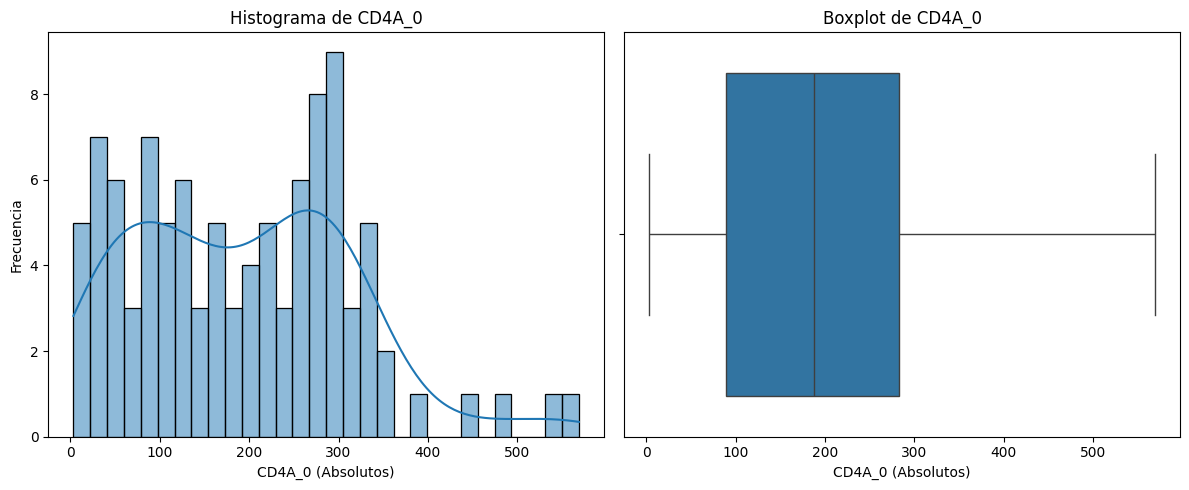

(count    100.000000
 mean     192.557000
 std      123.317785
 min        3.300000
 25%       89.000000
 50%      188.000000
 75%      283.000000
 max      569.000000
 Name: CD4A_0, dtype: float64,
 16)

In [8]:
# Estadísticas descriptivas 
cd4a_0_descriptive_stats = numeric_data_cleaned['CD4A_0'].describe()

#distribución 
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Histograma
sns.histplot(numeric_data_cleaned['CD4A_0'].dropna(), bins=30, kde=True, ax=ax[0])
ax[0].set_title('Histograma de CD4A_0')
ax[0].set_xlabel('CD4A_0 (Absolutos)')
ax[0].set_ylabel('Frecuencia')

# Boxplot
sns.boxplot(x=numeric_data_cleaned['CD4A_0'].dropna(), ax=ax[1])
ax[1].set_title('Boxplot de CD4A_0')
ax[1].set_xlabel('CD4A_0 (Absolutos)')

plt.tight_layout()
plt.show()

# Mostrar estadísticas descriptivas
cd4a_0_descriptive_stats, numeric_data_cleaned['CD4A_0'].isna().sum()

Podemos apreciar como nuestra variable objetivo cuenta con 16 valores missings, y veremos como afecta a nuestros analisis los distintos tratamientos de dichos missings.
Los niveles medios de CD4A_0 en este conjunto de datos son de 192.56, lo que nos da una idea del nivel típico de células CD4 en la muestra analizada.
La desviación estándar de 123.32 indica una variabilidad considerable en los niveles de CD4 entre los pacientes, reflejando la diversidad en la severidad de la condición inmunológica o en la respuesta al tratamiento entre la población estudiada.
Podemos apreciar como hay outliers, o valores excepcionalmente altos, lo que puede ser indicativos de respuestas particulares al tratamiento o de estados de salud que requieren atención especializada.

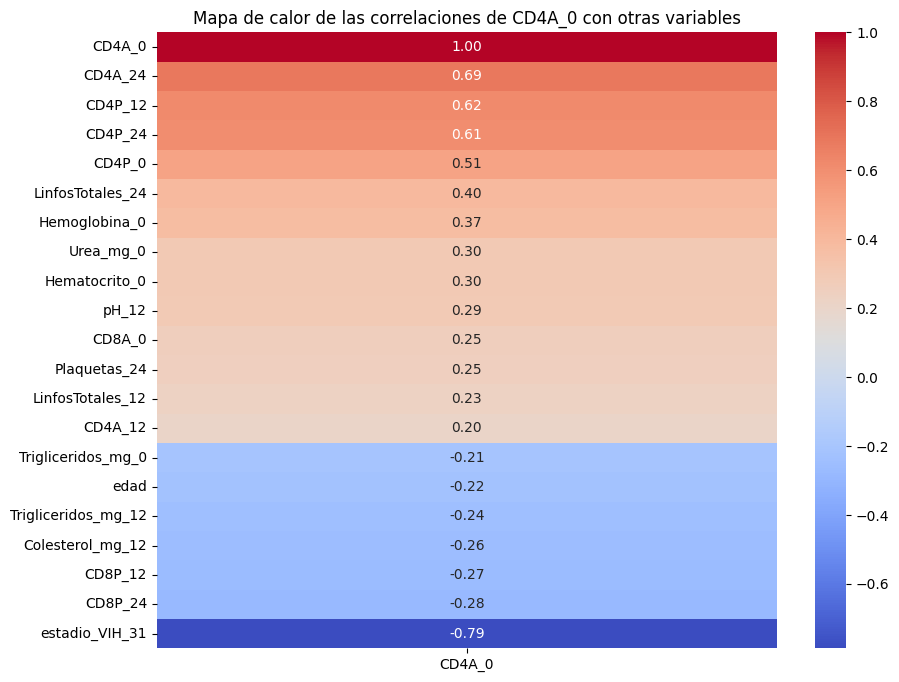

CD4A_0                 1.000000
CD4A_24                0.690517
CD4P_12                0.617903
CD4P_24                0.605245
CD4P_0                 0.510342
LinfosTotales_24       0.397907
Hemoglobina_0          0.372762
Urea_mg_0              0.299065
Hematocrito_0          0.298836
pH_12                  0.290907
CD8A_0                 0.253599
Plaquetas_24           0.248675
LinfosTotales_12       0.227594
CD4A_12                0.204924
Trigliceridos_mg_0    -0.211624
edad                  -0.223126
Trigliceridos_mg_12   -0.242627
Colesterol_mg_12      -0.263242
CD8P_12               -0.270162
CD8P_24               -0.278808
estadio_VIH_31        -0.786699
Name: CD4A_0, dtype: float64

In [9]:
#matriz de correlación centrada en la variable objetivo
correlation_matrix = numeric_data_cleaned.corr()['CD4A_0'].sort_values(ascending=False)

# ignoramos valores muy cercanos a cero
significant_correlations = correlation_matrix[abs(correlation_matrix) > 0.2]

plt.figure(figsize=(10, 8))
sns.heatmap(significant_correlations.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de las correlaciones de CD4A_0 con otras variables')
plt.show()

significant_correlations

Podemos ver algunas correlaciones positivas de las distintas variables con nuestra variable objetivo:
- CD4A_24 (0.69): Alta correlación con los niveles de CD4 absolutos a los 24 meses, indicando consistencia en los niveles de CD4 a lo largo del tiempo para muchos pacientes.
- CD4P_12 (0.62) y CD4P_24 (0.61): Correlaciones fuertes con el porcentaje de CD4 en los 12 y 24 meses, respectivamente, sugiriendo una relación estrecha entre los valores absolutos y porcentuales de CD4.
- LinfosTotales_24 (0.40) y Hemoglobina_0 (0.37): Correlaciones moderadas que podrían indicar una relación entre los niveles de CD4 y la hemoglobina y linfocitos.

A su vez, tambien hay algunas variables que presentan correlaciones negativas:
- Estadio_VIH_31 (-0.79): Una correlación negativa muy fuerte, implicando que niveles más altos de CD4 están asociados con estadios más bajos del VIH.
- Estadio_VIH_20 (-0.28) y CD8P_24 (-0.28): Indicativos de que un estadio avanzado de VIH y mayores porcentajes de células CD8 están inversamente relacionados con los niveles de CD4.

PUEDO HACER DOS COSAS: REALIZAR YA EL PCA Y RF,he reducido el dataset a 100 variables, o sacar de aqui las 20 variables mas

# Selección de variables

Antes de continuar con la aplicacion de Random Forest y PCA, se va a tratar los missings de las distintas variables numéricas.

In [10]:
# Contar el número de valores faltantes (NaN) en cada columna de numeric_data_cleaned
numeric_na_counts = numeric_data_cleaned.drop(columns=['CD4A_0']).isna().sum()

# Mostrar las columnas con valores faltantes
na_columns = numeric_na_counts[numeric_na_counts > 0]

na_columns

nvisita                 1
estadio_VIH_31          9
a32                     1
edad                    1
CargaViral_0           24
                       ..
LDL_mg_24              49
HDL_mg_24              43
Trigliceridos_mg_24    39
week_36                51
tpo_vih_meses           7
Length: 89, dtype: int64

Se va a comenzar con una preparación de los datos iniciales, separando las variables numéricas, sobre las cuales aplicar un método de selección completa de componentes.
Además, se continuará con la normalización de los datos para la PCA (Principal component analysis).
La normalización de los datos es un proceso necesario para realizar la PCA:
1. Varianza Basada en Magnitud: PCA busca los ejes en los cuales los datos varían más. Si una variable tiene una escala mucho mayor que otra, entonces la varianza puede ser dominada por la variable de mayor escala. Esto puede llevar a que PCA proporcione una representación sesgada de los datos.
2. Escala Unificada: Al normalizar los datos (por ejemplo, haciendo que cada característica tenga media cero y varianza uno), cada variable contribuye equitativamente a la distancia entre las observaciones en el espacio de características. Esto es crucial para que PCA identifique correctamente las direcciones de mayor varianza que son realmente informativas.
3. Ayuda a mejorar la interpretación de los datos.

Utilizaremos "StandardScaler" de la biblioteca scikit-learn, que resta la media y divide por la desviación estándar de cada característica, transformando los datos para que cada característica tenga una media de cero y una varianza de uno. [4]

In [11]:
# Imputación de valores faltantes con la mediana, excluyendo la variable objetivo
X = numeric_data_cleaned.drop(columns=['CD4A_0', 'nvisita', 'edad'])
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Normalización de los datos utilizando StandardScaler, excluyendo 'nvisita' y 'edad'
scaler = StandardScaler()
X_scaled_excl_nvisita_edad = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X_imputed.columns)

# Reintegrar 'nvisita', 'edad' y la variable objetivo 'CD4A_0'
X_scaled_excl_nvisita_edad['nvisita'] = numeric_data_cleaned['nvisita'].values
X_scaled_excl_nvisita_edad['edad'] = numeric_data_cleaned['edad'].values
data_normalized_with_target_adjusted = X_scaled_excl_nvisita_edad.copy()
data_normalized_with_target_adjusted['CD4A_0'] = numeric_data_cleaned['CD4A_0']

# Comprobar la combinación y la integridad de los datos
na_count_target_after = data_normalized_with_target_adjusted['CD4A_0'].isna().sum()
data_normalized_with_target_adjusted.head(), na_count_target_after

(   estadio_VIH_31  a32  week_0  CargaViral_0    CD4P_0    CD8A_0    CD8P_0  \
 0        0.805274  0.0     0.0     -0.134685 -0.089573 -0.234610  0.138702   
 1       -1.026330  0.0     0.0     -0.179781 -0.374060  0.621085  0.893187   
 2        0.805274  0.0     0.0     -0.224877 -0.509529 -0.553202 -2.879238   
 3       -1.026330  0.0     0.0     -0.306441 -0.157308  0.968701  0.893187   
 4       -1.026330  0.0     0.0     -0.028808  0.709697  0.154706 -0.276265   
 
    Hematocrito_0  Hemoglobina_0  Plaquetas_0  ...  Albumina_24  \
 0      -0.038245       0.337600    -0.861239  ...    -0.159434   
 1      -0.153978      -0.223633    -1.303436  ...    -0.159434   
 2      -0.790510      -0.784867     0.776527  ...    -0.160944   
 3       0.289665       0.587038    -0.353532  ...    -0.144335   
 4      -0.076823      -0.161274     0.105043  ...    -0.209260   
 
    Colesterol_mg_24  LDL_mg_24  HDL_mg_24  Trigliceridos_mg_24  week_36  \
 0          3.188067   1.156956  -0.445893  

Tras realizar la normalización de los datos, se va a visualizar la distribucion de los datos normalizados, para asegurar que se ha realizado correctamente.

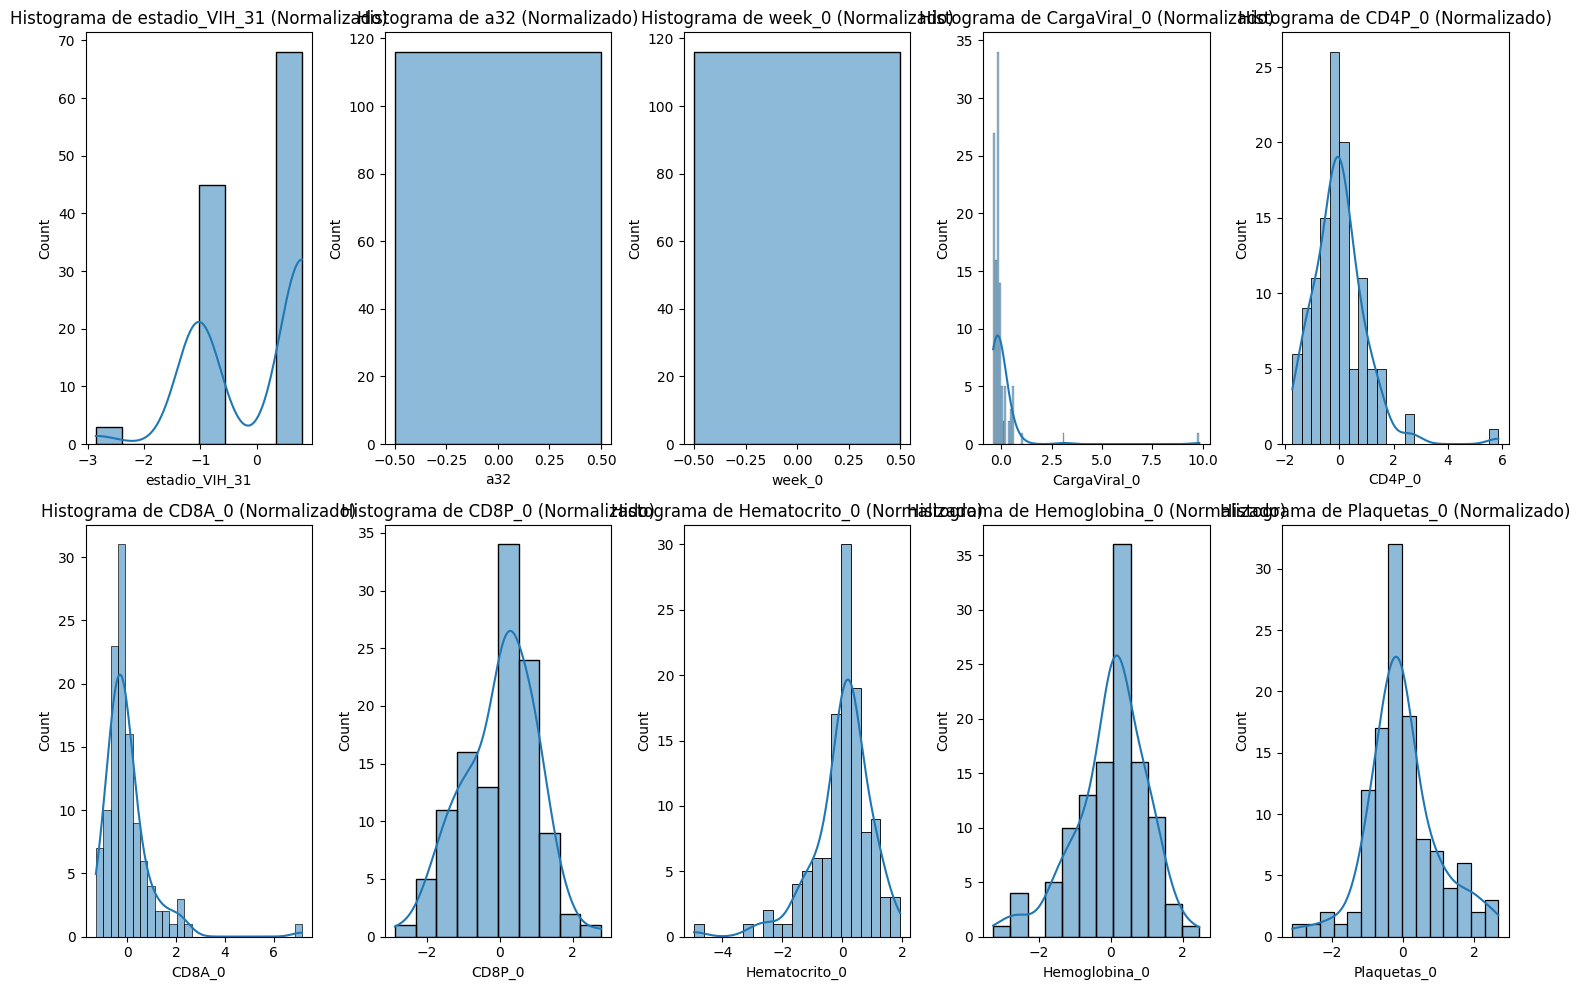

In [12]:
plt.figure(figsize=(15, 10))
for i, var in enumerate(X_scaled_excl_nvisita_edad.columns[:10], 1):
    plt.subplot(2, 5, i)
    sns.histplot(X_scaled_excl_nvisita_edad[var], kde=True)
    plt.title(f'Histograma de {var} (Normalizado)')
plt.tight_layout()
plt.show()

Los histogramas muestran que las variables normalizadas tienen distribuciones centradas alrededor de cero, con una desviación estándar cercana a uno.

Se va a combinar la variable objetivo CD4A_0 con el conjunto de datos normalizado para su uso en análisis y modelado.

In [13]:
# Reintegrar 'nvisita', 'edad' y la variable objetivo 'CD4A_0' con los datos normalizados
data_normalized_with_target_adjusted = X_scaled_excl_nvisita_edad.copy()
data_normalized_with_target_adjusted['nvisita'] = numeric_data_cleaned['nvisita'].values
data_normalized_with_target_adjusted['edad'] = numeric_data_cleaned['edad'].values
data_normalized_with_target_adjusted['CD4A_0'] = numeric_data_cleaned['CD4A_0']

# Verificar la combinación
data_normalized_with_target_adjusted.head()

,estadio_VIH_31,a32,week_0,CargaViral_0,CD4P_0,CD8A_0,CD8P_0,Hematocrito_0,Hemoglobina_0,Plaquetas_0,...,Albumina_24,Colesterol_mg_24,LDL_mg_24,HDL_mg_24,Trigliceridos_mg_24,week_36,tpo_vih_meses,nvisita,edad,CD4A_0
0,0.805274,0.0,0.0,-0.134685,-0.089573,-0.234610,0.138702,-0.038245,0.337600,-0.861239,...,-0.159434,3.188067,1.156956,-0.445893,3.026438,0.0,-0.269189,NaN,NaN,46.0
1,-1.026330,0.0,0.0,-0.179781,-0.374060,0.621085,0.893187,-0.153978,-0.223633,-1.303436,...,-0.159434,0.012096,0.022617,0.015712,-0.156923,0.0,1.538984,1.0,48.0,201.0
2,0.805274,0.0,0.0,-0.224877,-0.509529,-0.553202,-2.879238,-0.790510,-0.784867,0.776527,...,-0.160944,-0.381119,-0.681456,0.938920,-0.275411,0.0,0.575140,1.0,38.0,192.0
3,-1.026330,0.0,0.0,-0.306441,-0.157308,0.968701,0.893187,0.289665,0.587038,-0.353532,...,-0.144335,-0.108893,0.022617,-0.215091,0.980556,0.0,0.092921,1.0,29.0,254.4
4,-1.026330,0.0,0.0,-0.028808,0.709697,0.154706,-0.276265,-0.076823,-0.161274,0.105043,...,-0.209260,0.284322,0.100847,0.246514,0.040556,0.0,0.374761,1.0,33.0,334.4


In [14]:
# Contar el número de valores faltantes (NaN) en la variable objetivo
na_count_target = data_normalized_with_target_adjusted['CD4A_0'].isna().sum()

na_count_target

16

Se ha descubierto que el Análisis de Componentes Principales (PCA) y el Random Forest pueden usarse conjuntamente para la selección de variables. Este enfoque combinado aprovecha las fortalezas de ambos métodos para mejorar el rendimiento de los modelos, especialmente en conjuntos de datos de alta dimensionalidad.
Existe un método denominado Selección Completa de Componentes (FCS) en el que inicialmente se utiliza el PCA para transformar los datos, reduciendo la dimensionalidad, y luego se aplica Random Forest para seleccionar los componentes más relevantes de los datos transformados. Este método ha demostrado mejorar significativamente el rendimiento de los modelos al identificar no solo los primeros componentes principales, sino también otros que son altamente relevantes para la variable objetivo. [5]

A modo de resumen, el uso conjunto de la técnica PCA y Random forest ofrece numerosas ventajas:
- Reducción de la dimensionalidad
PCA: Reduce la dimensionalidad de datos complejos, conservando la mayor parte de la variabilidad en los datos originales. Esto simplifica el modelo y reduce el riesgo de sobreajuste.
Random Forest: Puede manejar grandes conjuntos de datos y utilizar las características más importantes seleccionadas por PCA para construir modelos robustos y precisos.
- Mejora en el diagnóstico médico.
PCA puede reducir el ruido en los datos médicos y seleccionar las características más relevantes, mientras que Random Forest puede utilizar estas características para realizar predicciones precisas sobre la presencia o progresión de enfermedades [6]
- Mejora el rendimiento del modelo: PCA reduce la dimensionalidad y elimina el ruido, lo que permite a Random Forest centrarse en las características más importantes, mejorando la precisión y eficiencia del modelo.
- Mejor manejo de datos correlacionados: PCA transforma las variables correlacionadas en un conjunto de componentes no correlacionados, y Random Forest puede usar estas nuevas características para hacer predicciones más precisas sin verse afectado por la multicolinealidad.

En el trabajo de Zhang et al. (2020) [7], se menciona cómo PCA puede reducir la complejidad de los datos multidimensionales y seleccionar las características más relevantes para mejorar la precisión diagnóstica. Esto permite que Random Forest utilice estas características optimizadas para hacer predicciones precisas en el diagnóstico de la retinopatía diabética.
Mohapatra y Mohanty (2020) discuten cómo PCA puede extraer las características principales de señales biomédicas como ECG, lo que facilita a Random Forest clasificar estas señales con una alta precisión, logrando un 87% de precisión en su estudio.[8]. Es por eso que se va a optar por usar esta técnica, combinando ambas técnicas para  seleccionar las variables mas útiles para nuestra variable objetiva.

Llegados a este punto, se va a proceder con el Principal component analysis 

In [15]:
# Se excluye la variable objetivo antes de aplicar PCA
X_pca_input = data_normalized_with_target_adjusted.drop(columns=['CD4A_0'])
# Asegurarnos de imputar valores faltantes en las características, excluyendo la variable objetivo
imputer = SimpleImputer(strategy='median')
X_pca_input_imputed = pd.DataFrame(imputer.fit_transform(X_pca_input), columns=X_pca_input.columns)

pca = PCA()
X_pca = pca.fit_transform(X_pca_input_imputed)

# Varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# varianza acumulada
cumulative_explained_variance = explained_variance.cumsum()

# Determinar el número de componentes necesarios para explicar al menos el 95% de la varianza
num_components_95 = next(i for i, total_var in enumerate(cumulative_explained_variance) if total_var >= 0.95) + 1

num_components_95

40

Se necesitan 40 componentes principales para explicar al menos el 95% de la varianza en tu conjunto de datos. Esto implica que se puede reducir la dimensionalidad del conjunto de datos  de 91 variables a 40 componentes principales, manteniendo la mayor parte de la información original (95% de la varianza). Asi conseguimos reducir el riesgo de sobreajuste.

Esto significa que aunque se esta reduciendo el número de variables, se sigue conservando el 95% de la varianza total del conjunto de datos original, lo que significa que la mayor parte de la información se mantiene.

In [16]:
# Aplicar PCA con el número de componentes determinado
pca = PCA(n_components=num_components_95)
X_pca_transformed = pca.fit_transform(X_pca_input_imputed)

# Crear un DataFrame con los componentes principales
X_pca_df = pd.DataFrame(X_pca_transformed, columns=[f'PC{i+1}' for i in range(num_components_95)])

# Añadir la variable objetivo al DataFrame de componentes principales
X_pca_df['CD4A_0'] = data_normalized_with_target_adjusted['CD4A_0'].values

# Verificar la transformación
X_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,CD4A_0
0,0.551382,1.236065,-1.089126,-4.586675,2.040994,-2.422281,0.845666,2.380101,1.301905,-0.213258,...,-0.016244,-0.503581,-0.760769,-1.609591,0.951063,1.859321,-0.176308,-0.002003,1.211654,46.0
1,-10.250988,-0.413724,0.549846,0.209282,-0.263360,0.199482,0.123934,0.747625,-0.771442,-0.164093,...,0.550761,-1.184446,-0.674588,0.483085,0.485681,0.711805,-0.386996,-0.274170,-0.052567,201.0
2,-0.148657,-0.919456,-1.955232,2.539335,-0.299099,2.754012,1.562579,0.617632,0.434296,1.536639,...,0.551169,0.773574,-1.706175,1.474802,0.861639,-0.969856,1.696239,1.700739,1.097632,192.0
3,8.746638,-1.519500,2.028546,0.925892,-1.336448,-1.187450,1.620718,0.446236,0.912463,-0.386610,...,0.558729,0.174472,-0.308394,-0.282536,-0.248484,-0.125627,-0.974773,0.191455,-1.034587,254.4
4,4.931959,-2.057235,0.430260,1.848402,-1.184426,0.832572,-0.145297,1.049843,1.286278,0.952140,...,-0.022177,-0.437048,-0.957290,0.045702,-0.054018,0.062417,-0.270834,0.063978,0.400552,334.4


No se puede usar Random Forest directamente cuando la variable objetivo presenta valores NA, porque este algoritmo no está diseñado para manejar datos faltantes en la variable de predicción. Random Forest requiere un valor concreto en la variable objetivo para poder crear los árboles de decisión ya que estos árboles se utilizan para predecir la variable objetivo basándose en las características de los datos de entrada. Sin una variable objetivo completa, el modelo no puede aprender adecuadamente.

Para abordar los valores faltantes en la variable objetivo y evaluar cómo diferentes métodos de tratamiento afectan el rendimiento del modelo Random Forest, se van a considerar varias estrategias, o se va a ver si por el contrario no se aprecia ningun cambio en la selección de variables, y por lo tanto de los modelos posteriores de predicción.
Las estrategias a considerar son:
1. Eliminación de Filas con Valores Faltantes: Esta es la forma más sencilla, pero puede no ser ideal si hay muchos valores faltantes.
2. Imputación Simple: Usar la media, mediana o moda para imputar los valores faltantes.
3. Modelado para Imputación: Utilizar un modelo preliminar para predecir y completar los valores faltantes.
4. Imputación Multiple: Utilizar técnicas más avanzadas como la imputación múltiple para tratar los valores faltantes.

# Eliminación de Filas con Valores Faltantes
Este método consiste en eliminar todas las filas que contienen valores faltantes en la variable objetivo. Es una técnica simple y directa, pero puede resultar en una pérdida significativa de datos si los valores faltantes son numerosos.
La eliminación de filas con valores faltantes puede simplificar el análisis, pero a costa de reducir el tamaño del conjunto de datos, lo que puede llevar a una pérdida de información y potencialmente a un sesgo si los datos no son faltantes completamente al azar. [9]

In [17]:
df_dropped = X_pca_df.dropna(subset=['CD4A_0'])

# Separar las características y la variable objetivo
X_dropped = df_dropped.drop(columns=['CD4A_0'])
y_dropped = df_dropped['CD4A_0']

# Entrenar y evaluar el modelo de Random Forest
rf_model_dropped = RandomForestRegressor(n_estimators=100, random_state=42)
scores_dropped = cross_val_score(rf_model_dropped, X_dropped, y_dropped, cv=5, scoring='neg_mean_squared_error')
rmse_scores_dropped = (-scores_dropped) ** 0.5

# Resultados
print(f'Eliminación de Filas - RMSE medio: {rmse_scores_dropped.mean():.2f}, Desviación estándar: {rmse_scores_dropped.std():.2f}')

Eliminación de Filas - RMSE medio: 101.94, Desviación estándar: 15.44


# Imputación Simple
La imputación simple rellena los valores faltantes utilizando la mediana, fácil de implementar y puede ser eficaz si los datos faltantes son pocos y se distribuyen aleatoriamente.
Técnica robusta que evita la eliminación de datos, pero puede introducir sesgos si los valores faltantes tienen una distribución específica o si son numerosos.

In [18]:
# Imputar los valores faltantes en la variable objetivo con la mediana
imputer_median = SimpleImputer(strategy='median')
X_pca_df['CD4A_0_imputed'] = imputer_median.fit_transform(X_pca_df[['CD4A_0']])

# Separar las características y la variable objetivo
X_imputed = X_pca_df.drop(columns=['CD4A_0'])
y_imputed = X_pca_df['CD4A_0_imputed']

# Random Forest
rf_model_imputed = RandomForestRegressor(n_estimators=100, random_state=42)
scores_imputed = cross_val_score(rf_model_imputed, X_imputed, y_imputed, cv=5, scoring='neg_mean_squared_error')
rmse_scores_imputed = (-scores_imputed) ** 0.5

# Resultados
print(f'Imputación Simple (Mediana) - RMSE medio: {rmse_scores_imputed.mean():.2f}, Desviación estándar: {rmse_scores_imputed.std():.2f}')

Imputación Simple (Mediana) - RMSE medio: 14.69, Desviación estándar: 9.04


# Modelado para Imputación
se entrena un modelo preliminar utilizando las filas con valores completos en la variable objetivo. Este modelo se utiliza para predecir los valores faltantes en la variable objetivo. Posteriormente, se entrena el modelo principal utilizando el conjunto de datos con los valores imputados.[10]

In [19]:
# Dividir el conjunto de datos en casos completos y casos faltantes
complete_cases = X_pca_df.dropna(subset=['CD4A_0'])
missing_cases = X_pca_df[X_pca_df['CD4A_0'].isna()]

#  modelo para predecir los valores faltantes
X_complete = complete_cases.drop(columns=['CD4A_0'])
y_complete = complete_cases['CD4A_0']
rf_prelim_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_prelim_model.fit(X_complete, y_complete)

# Predecir los valores faltantes
X_missing = missing_cases.drop(columns=['CD4A_0'])
y_missing_pred = rf_prelim_model.predict(X_missing)

# Imputar los valores predichos
X_pca_df.loc[X_pca_df['CD4A_0'].isna(), 'CD4A_0'] = y_missing_pred

# Separar las características y la variable objetivo
X_modeled = X_pca_df.drop(columns=['CD4A_0'])
y_modeled = X_pca_df['CD4A_0']

# Entrenar y evaluar el modelo de Random Forest
rf_model_modeled = RandomForestRegressor(n_estimators=100, random_state=42)
scores_modeled = cross_val_score(rf_model_modeled, X_modeled, y_modeled, cv=5, scoring='neg_mean_squared_error')
rmse_scores_modeled = (-scores_modeled) ** 0.5

# Resultados
print(f'Modelado para Imputación - RMSE medio: {rmse_scores_modeled.mean():.2f}, Desviación estándar: {rmse_scores_modeled.std():.2f}')

Modelado para Imputación - RMSE medio: 15.03, Desviación estándar: 9.90


# Imputación Múltiple
utiliza modelos estadísticos para generar múltiples imputaciones y luego combina los resultados. Este método toma en cuenta la incertidumbre asociada con la imputación y proporciona estimaciones más precisas y menos sesgadas.
Es una técnica avanzada que proporciona una mejor estimación de los valores faltantes al considerar la variabilidad entre diferentes imputaciones. Es especialmente útil cuando hay un gran número de valores faltantes y cuando estos no son al azar. [11]

In [20]:
# Imputación múltiple
iterative_imputer = IterativeImputer(random_state=42)
X_pca_df['CD4A_0_imputed_multiple'] = iterative_imputer.fit_transform(X_pca_df[['CD4A_0']])

# Separar las características y la variable objetivo
X_imputed_multiple = X_pca_df.drop(columns=['CD4A_0'])
y_imputed_multiple = X_pca_df['CD4A_0_imputed_multiple']

# Entrenar y evaluar el modelo de Random Forest
rf_model_imputed_multiple = RandomForestRegressor(n_estimators=100, random_state=42)
scores_imputed_multiple = cross_val_score(rf_model_imputed_multiple, X_imputed_multiple, y_imputed_multiple, cv=5, scoring='neg_mean_squared_error')
rmse_scores_imputed_multiple = (-scores_imputed_multiple) ** 0.5

# Resultados
print(f'Imputación Múltiple - RMSE medio: {rmse_scores_imputed_multiple.mean():.2f}, Desviación estándar: {rmse_scores_imputed_multiple.std():.2f}')

Imputación Múltiple - RMSE medio: 13.20, Desviación estándar: 8.50


Comparando los resultados de los diferentes métodos de tratamiento de valores faltantes, se observa que la eliminación de filas con valores faltantes resultó en el mayor error de predicción, con un RMSE medio de 101.94 y una desviación estándar de 15.44, debido a la pérdida significativa de datos.

Por otro lado, la imputación simple utilizando la mediana mejoró considerablemente el rendimiento, obteniendo un RMSE medio de 14.69 y una desviación estándar de 9.04, aunque puede no ser la mejor opción si los valores faltantes son numerosos o no aleatorios.

El modelado para imputación, donde se utiliza un modelo preliminar para predecir los valores faltantes, resultó en un RMSE medio de 15.03 y una desviación estándar de 9.90, mostrando un rendimiento similar a la imputación simple pero con un ligero aumento en la variabilidad.

La imputación múltiple, que proporciona estimaciones más precisas y menos sesgadas al considerar la variabilidad entre diferentes imputaciones, ofreció el mejor rendimiento con un RMSE medio de 13.20 y una desviación estándar de 8.50.

En resumen, la imputación múltiple es la técnica más efectiva para manejar valores faltantes en la variable objetivo en este caso, seguida por la imputación simple y el modelado para imputación. La eliminación de filas, aunque sencilla, debe ser evitada si resulta en una pérdida considerable de datos. 